In [3]:
import numpy as np
import pandas as pd

In [6]:
import matplotlib.pyplot as plt
np.random.seed(42)
x = np.random.rand(100, 1) - 0.5
y = 3*x[:, 0]**2 + 0.05 * np.random.randn(100)

In [8]:
df = pd.DataFrame()
df['x'] = x.reshape(100)
df['y'] = y

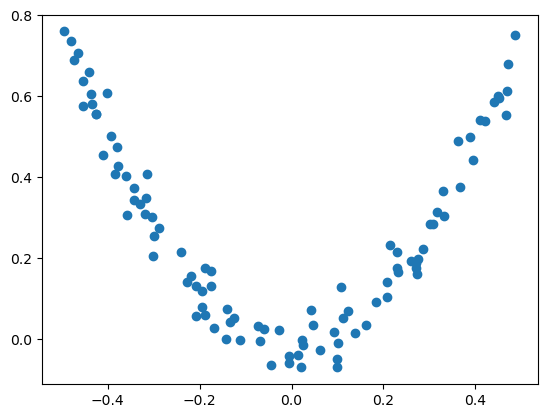

In [10]:
plt.scatter(df['x'],df['y'])

In [15]:
from sklearn.tree import DecisionTreeRegressor

def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return 
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)


5


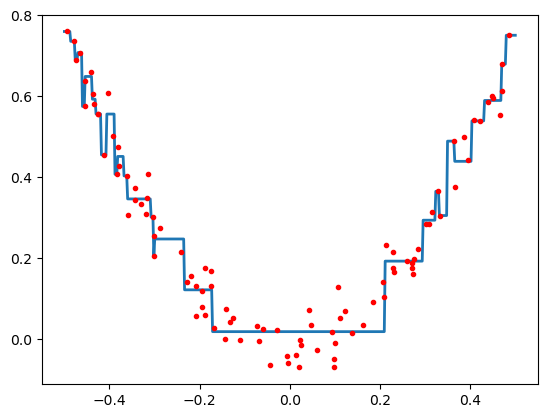

4


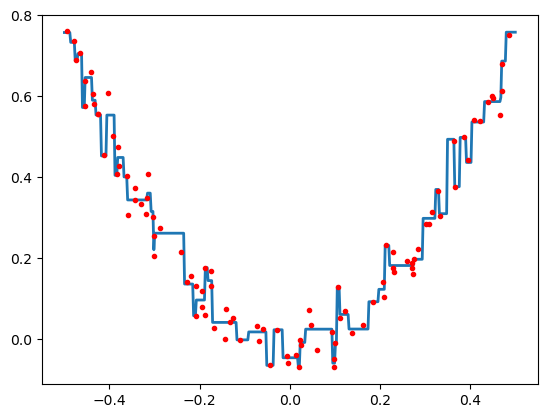

3


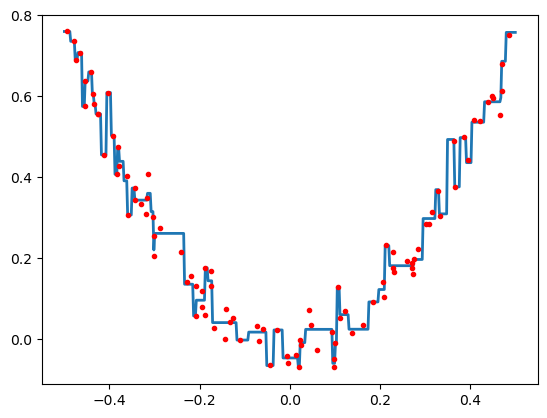

2


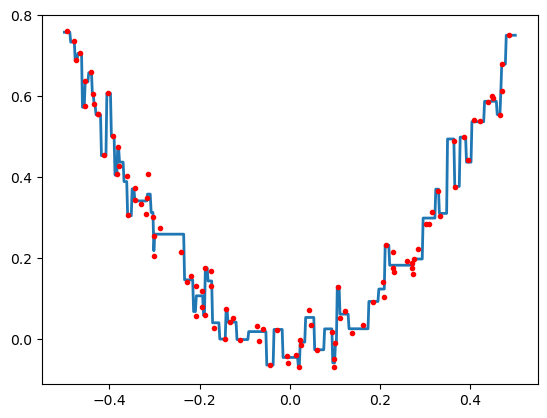

1


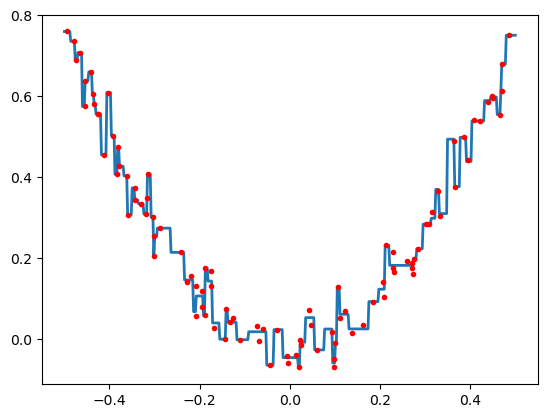

In [16]:
gradient_boost(x,y,5,lr=1)

### step - by step procedure

In [17]:
df

,x,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


In [54]:
# model 1 
learning_rate = 0.5
df['y_pred1'] = df['y'].mean()

In [55]:
df

,x,y,y_pred1,res1,y_pred2,res2,y_pred3,res3,y_pred4
0,-0.125460,0.051573,0.265458,-0.213885,-0.247139,0.298712,0.261460,-0.209887,0.261460
1,0.450714,0.594480,0.265458,0.329021,0.340426,0.254054,0.257097,0.337382,0.257097
2,0.231994,0.166052,0.265458,-0.099407,-0.049674,0.215726,0.257097,-0.091046,0.257097
3,0.098658,-0.070178,0.265458,-0.335636,-0.247139,0.176961,0.227328,-0.297506,0.227328
4,-0.343981,0.343986,0.265458,0.078528,0.040506,0.303480,0.261460,0.082526,0.261460
...,...,...,...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.247139,0.206464,0.227328,-0.268003,0.227328
96,0.022733,-0.002305,0.265458,-0.267763,-0.247139,0.244834,0.227328,-0.229633,0.227328
97,-0.072459,0.032809,0.265458,-0.232650,-0.247139,0.279947,0.261460,-0.228651,0.261460
98,-0.474581,0.689516,0.265458,0.424057,0.395454,0.294062,0.327533,0.361982,0.327533


In [56]:
df['res1'] = df['y'] - df['y_pred1']

In [57]:
df

,x,y,y_pred1,res1,y_pred2,res2,y_pred3,res3,y_pred4
0,-0.125460,0.051573,0.265458,-0.213885,-0.247139,0.298712,0.261460,-0.209887,0.261460
1,0.450714,0.594480,0.265458,0.329021,0.340426,0.254054,0.257097,0.337382,0.257097
2,0.231994,0.166052,0.265458,-0.099407,-0.049674,0.215726,0.257097,-0.091046,0.257097
3,0.098658,-0.070178,0.265458,-0.335636,-0.247139,0.176961,0.227328,-0.297506,0.227328
4,-0.343981,0.343986,0.265458,0.078528,0.040506,0.303480,0.261460,0.082526,0.261460
...,...,...,...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.247139,0.206464,0.227328,-0.268003,0.227328
96,0.022733,-0.002305,0.265458,-0.267763,-0.247139,0.244834,0.227328,-0.229633,0.227328
97,-0.072459,0.032809,0.265458,-0.232650,-0.247139,0.279947,0.261460,-0.228651,0.261460
98,-0.474581,0.689516,0.265458,0.424057,0.395454,0.294062,0.327533,0.361982,0.327533


In [58]:
# model 2
dtr2 = DecisionTreeRegressor(max_leaf_nodes=8)
dtr2.fit(df['x'].values.reshape(100,1),df['res1'])


DecisionTreeRegressor(max_leaf_nodes=8)

In [59]:
df['y_pred2'] = dtr2.predict(df['x'].values.reshape(100,1))

In [60]:
df

,x,y,y_pred1,res1,y_pred2,res2,y_pred3,res3,y_pred4
0,-0.125460,0.051573,0.265458,-0.213885,-0.247139,0.298712,0.261460,-0.209887,0.261460
1,0.450714,0.594480,0.265458,0.329021,0.340426,0.254054,0.257097,0.337382,0.257097
2,0.231994,0.166052,0.265458,-0.099407,-0.049674,0.215726,0.257097,-0.091046,0.257097
3,0.098658,-0.070178,0.265458,-0.335636,-0.247139,0.176961,0.227328,-0.297506,0.227328
4,-0.343981,0.343986,0.265458,0.078528,0.040506,0.303480,0.261460,0.082526,0.261460
...,...,...,...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.247139,0.206464,0.227328,-0.268003,0.227328
96,0.022733,-0.002305,0.265458,-0.267763,-0.247139,0.244834,0.227328,-0.229633,0.227328
97,-0.072459,0.032809,0.265458,-0.232650,-0.247139,0.279947,0.261460,-0.228651,0.261460
98,-0.474581,0.689516,0.265458,0.424057,0.395454,0.294062,0.327533,0.361982,0.327533


In [61]:
df['res2'] = df['y'] - df['y_pred2']

In [62]:
dtr3 = DecisionTreeRegressor(max_leaf_nodes=8)
dtr3.fit(df['x'].values.reshape(100,1),df['res2'])

DecisionTreeRegressor(max_leaf_nodes=8)

In [63]:
df['y_pred3'] = dtr3.predict(df['x'].values.reshape(100,1))

In [64]:
df

,x,y,y_pred1,res1,y_pred2,res2,y_pred3,res3,y_pred4
0,-0.125460,0.051573,0.265458,-0.213885,-0.247139,0.298712,0.261460,-0.209887,0.261460
1,0.450714,0.594480,0.265458,0.329021,0.340426,0.254054,0.257097,0.337382,0.257097
2,0.231994,0.166052,0.265458,-0.099407,-0.049674,0.215726,0.257097,-0.091046,0.257097
3,0.098658,-0.070178,0.265458,-0.335636,-0.247139,0.176961,0.227328,-0.297506,0.227328
4,-0.343981,0.343986,0.265458,0.078528,0.040506,0.303480,0.261460,0.082526,0.261460
...,...,...,...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.247139,0.206464,0.227328,-0.268003,0.227328
96,0.022733,-0.002305,0.265458,-0.267763,-0.247139,0.244834,0.227328,-0.229633,0.227328
97,-0.072459,0.032809,0.265458,-0.232650,-0.247139,0.279947,0.261460,-0.228651,0.261460
98,-0.474581,0.689516,0.265458,0.424057,0.395454,0.294062,0.327533,0.361982,0.327533


In [65]:
df['res3'] = df['y'] - df['y_pred3']
dtr4 = DecisionTreeRegressor(max_leaf_nodes=8)
dtr4.fit(df['x'].values.reshape(100,1),df['res3'])
df['y_pred4'] = dtr3.predict(df['x'].values.reshape(100,1))


(-0.5, 0.5)

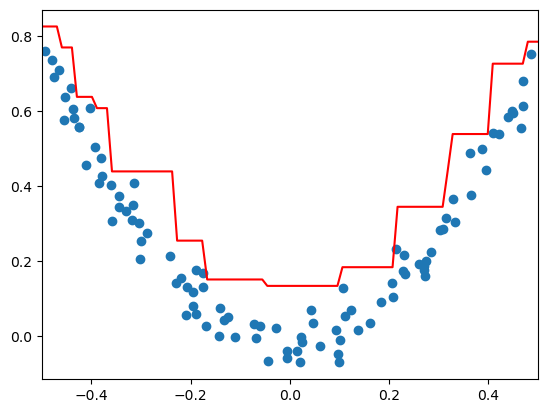

In [67]:
plt.scatter(df['x'],df['y'])
x = np.linspace(-0.5,0.5,100).reshape(100,1)
y_pred_final = 0.265458+learning_rate*dtr2.predict(x)+learning_rate*dtr3.predict(x)+learning_rate*dtr4.predict(x)
plt.plot(x,y_pred_final,c='red')
plt.xlim(-0.5,0.5)